<span style="background-color: lightgreen"><font size =6>Flash Card:</font></span>

**Steps:**
* types of flash cards
* define the types we want: what content, format etc.
* detailed design: input, output
* implement

# types of flash card
* example, we are familiar with these kinds

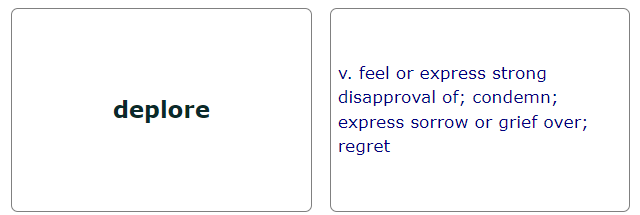

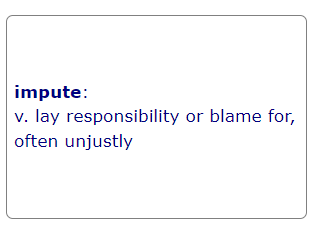

In [5]:
from IPython.display import Image, display, Markdown 
display(Image(r"C:\SP\Teaching\gifs\flashcard_db.png"))
display(Image(r"C:\SP\Teaching\gifs\flashcard_oneside.png"))

# define the types we want: what content, format etc
* how about we add anotynyms and synonyms, and sample sentences
* how about we have multiple choices?

# detailed design: input, output

In [22]:
import os 
import re 
import requests 
import numpy as np
import math
from bs4 import BeautifulSoup  
import pandas as pd 
from pathlib import Path
import nltk 
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from IPython.display import Image, display, Markdown
import matplotlib.pyplot as plt
from PIL import Image as img
import random

import wikipedia
import wordcloud
from tkinter import *
from tkinter import ttk
import tkinter
  

In [118]:
df[df["Word"] == "zodiac"]

,SAT_Sequence,Word,Word Type,Primary Definition,seq,additional_definition,sample sentences,synonyms,antonyms,Review_Times,Took_Seconds
11551,5999,zodiac,noun,an astrological system,1,a belt-shaped region in the heavens on either ...,,zodiac,,0,0
11552,5999,zodiac,noun,an astrological system,2,(astrology) a circular diagram representing th...,,zodiac,,0,0


'zodiac'

In [139]:
word

KeyError: 3

In [158]:
def load_words(file=None):
    """
        to do
    """
    if not file:
        file ="c:/dscamp/lessons/session06/EnrichedSatWordList.csv"
    if not os.path.exists(file):
        raise Exception("File doesnot exists")
                        
    df = pd.read_csv(file) 
    
    if "Review_Times" not in list(df):
        df["Review_Times"] = 0 
    
    if "Lasttime_Took_Seconds" not in list(df):
        df["Took_Seconds"] = 0 
    
    df = df.fillna("")  
    
    return df 

df = load_words() 

def learning_stats(df):
    n_words = df["Word"].nunique()
    reviewed_words =df[df["Review_Times"]>0]["Word"].nunique()
    return n_words, reviewed_words

def choose_a_word(df, method):
    """
        alphabetically
        randomly
    """
    if  method == "alphabetically":
        word = ""
        for row in df.itertuples():  
            if row.Review_Times > 0:
                continue 
                
            word = row[2]
            Word_Type = row[3]
            Primary_Definition = row[4] 
            additional_definition = row[6]
            sample_sentences = row[7]
            synonyms = row[8]
            antonyms = row[9]  
            Review_Times = row[10] 
            Lasttime_Took_Seconds = row[11]
            break 
    else: 
        words = df[(df["Review_Times"]==0) | (df["Review_Times"]==0)]["Word"] 
        if len(words) == 0:
            word = ""
        else:
            word = random.choice(words)
            row = df[df["Word"]==word].iloc[0, :]
            Word_Type = row[2]
            Primary_Definition = row[3] 
            additional_definition = row[5]
            sample_sentences = row[6]
            synonyms = row[7]
            antonyms = row[8]  
            Review_Times = row[9]  
            Took_Seconds = row[10]  
    if word != "":
        return word, Word_Type, Primary_Definition, \
        additional_definition, sample_sentences, \
        synonyms, antonyms, Review_Times, Took_Seconds
    else:
        return "Yahoo!", "", "You Complete all the SAT words", "", "", ", ", 0,  0 
    
    
    
    
 
 

,SAT_Sequence,Word,Word Type,Primary Definition,seq,additional_definition,sample sentences,synonyms,antonyms
0,1,abash,verb,to make ashamed,1,cause to be embarrassed; cause to feel self-co...,NaN,embarrass. abash,NaN
1,2,abate,verb,to put an end to,1,make less active or intense,NaN,slake. abate. slack,NaN
2,2,abate,verb,to put an end to,2,become less in amount or intensity,The storm abated. The rain let up after a few ...,abate. let_up. slack_off. slack. die_away,NaN
3,3,abbess,noun,a female superior or governess of a nunnery,1,the superior of a group of nuns,NaN,abbess. mother_superior. prioress,NaN
4,4,abbey,noun,a monastery or society of people,1,a church associated with a monastery or convent,NaN,abbey,NaN
...,...,...,...,...,...,...,...,...,...
11549,5998,zephyr,noun,"a gentle, mild breeze",1,a slight wind (usually refreshing),The breeze was cooled by the lake. As he waite...,breeze. zephyr. gentle_wind. air,NaN
11550,5998,zephyr,noun,"a gentle, mild breeze",2,(Greek mythology) the Greek god of the west wind,NaN,Zephyr,NaN
11551,5999,zodiac,noun,an astrological system,1,a belt-shaped region in the heavens on either ...,NaN,zodiac,NaN
11552,5999,zodiac,noun,an astrological system,2,(astrology) a circular diagram representing th...,NaN,zodiac,NaN


In [191]:
from tkinter import * 

def main(): 
    
    #root.geometry('750x500-0+0') # 120 * 50 ppixels in top right corner of desktop
    #app = Application(root)
    #app.master.title('Home Made SAT Word Flash Cards')
    root = tkinter.Tk()
    root.title("Home Made SAT Word Flash Cards")  
    
    sat_book = load_words() 
    total_w, reviewed_w = learning_stats(sat_book)
    
    canvas = Canvas(root,  width=750, height=500) #bg="lightblue",

    label_total_count = tkinter.Label(root, text="Vocabulary Size:", fg = "black", font = ("Times", 15))
    label_total_count.place(relx = 0.2, rely = 0.05, anchor ='w') 

    label_total_count_val = tkinter.Label(root, 
        text=total_w,     fg = "black",        font = ("Times", 15)   )
    label_total_count_val.place(relx = 0.65, rely = 0.05, anchor ='e'    )  

    reviewed_count = tkinter.Label(root, text="You've Revied:",
        fg = "black", font = ("Times", 15)    )
    reviewed_count.place(relx = 0.2, rely = 0.10, anchor ='w')  
    reviewed_count_val = tkinter.Label(root, text=reviewed_w, fg = "black", font = ("Times", 15)    )
    reviewed_count_val.place(relx = 0.65,  rely = 0.1,anchor ='e'    ) 


    reviewed_count = tkinter.Label(root, text="Pop-up New Word:",fg = "black",  font = ("Times", 15)    )
    reviewed_count.place(  relx = 0.2, rely = 0.15,  anchor ='w'    )  

    combobox = ttk.Combobox(root,state= "readonly", width = 12)
    combobox['values']=('Alphabetically','Randomly')
    combobox.current(1)
    combobox.place(   relx = 0.65,   rely = 0.15,  anchor ='e'    ) 
 
    canvas.create_line(0,105,1000,105,fill="red") 
    
    label_word_val = tkinter.Label(root, text=word, fg = "black", font = ("Times", 25))
    label_word_val.place(relx = 0.5, rely = 0.30, anchor ='e')  

    label_definition = tkinter.Label(root, text="definition", fg = "black", font = ("Times", 15))
    label_definition.place(relx = 0.1, rely = 0.40, anchor ='w')  
    label_definition_val = tkinter.Label(root, text=definition, fg = "black", font = ("Times", 15))
    label_definition_val.place(relx = 0.6, rely = 0.40, anchor ='w') 

    label_synomyms = tkinter.Label(root, text="synomyms", fg = "black", font = ("Times", 15))
    label_synomyms.place(relx = 0.1, rely = 0.50, anchor ='w') 
    label_synomyms_val = tkinter.Label(root, text=synomyms, fg = "black", font = ("Times", 15))
    label_synomyms_val.place(relx = 0.6, rely = 0.50, anchor ='w') 

    label_antonyms = tkinter.Label(root, text="antonyms", fg = "black", font = ("Times", 15))
    label_antonyms.place(relx = 0.1, rely = 0.60, anchor ='w')  
    label_antonyms_val = tkinter.Label(root, text=antonyms, fg = "black", font = ("Times", 15))
    label_antonyms_val.place(relx = 0.6, rely = 0.60, anchor ='w')  

    label_sentences = tkinter.Label(root, text="sentences", fg = "black", font = ("Times", 15))
    label_sentences.place(relx = 0.1, rely = 0.70, anchor ='w') 
    label_sentences_val = tkinter.Label(root, text=sentences, fg = "black", font = ("Times", 15))
    label_sentences_val.place(relx = 0.6, rely = 0.70, anchor ='w') 


    #end
    canvas.create_line(0,450,1000,450,fill="red")
    btn = Button(root, text = 'Next One', bd = '5', command = on_click) 
    btn2 = Button(root, text = 'Exit', bd = '5', command = root.destroy)
    btn.place(  relx = 0.55,  rely = 0.95,  anchor ='e') 
    btn2.place(  relx = 0.90,  rely = 0.95,  anchor ='w') 

    
    canvas.pack() 
    
    root.mainloop() 

def on_click():
     
    #label_antonyms.configure(text=method)
 
    word, Word_Type, Primary_Definition, \
    additional_definition, sample_sentences, \
    synonyms, antonyms, Review_Times, Took_Seconds = choose_a_word(df, method) 
    label_sentences.config(text = "aaaaaaaaaaaaaaaaaaaaaaaaaaaa")
    #if __name__ == '__main__':
    #    main()
main()

In [178]:
input("Choose A Tea:")

Choose A Tea: 22


'22'

In [167]:
from enum import unique


def all_supplies_delivered(total_needed, delivery_records = None):

    """

       supply delivery checking system
       
       input: total_needed: a dictionary where the keys are each individual supplies and 
       the corresponding value to a key is the amount of the specified supply required, 
       delivery_records: a 2d dictionary where the keys are delivery dates and the corresponding 
       value is another dictionary where the keys are the individual supplies and the 
       corresponding value is the amount delivered on the specific delivery date
       
       checks if the amount of each invidual supplies delivered according to the
       delivery records meets the total amount needed for each individual supplies

       output: returns true if the total amount is met, otherwise returns false and what supplies
       are missing and what amount

    """

    if delivery_records is None:
        return False, total_needed
    
    supplies = total_needed.keys()
    deliveries = list(delivery_records.values())
    missing_supplies = {}
    for supply in supplies:
        supply_delivered = 0
        for delivery in deliveries:
            if supply in delivery:
                supply_delivered += delivery[supply]
        if supply_delivered < total_needed[supply]:
            missing_supplies[supply] = total_needed[supply] - supply_delivered
    if len(missing_supplies) == 0:
        return True
    else:
        return False, missing_supplies

#test inputs
total_true = {"paper": 100, "pencils": 47, "pens": 30, "staplers": 4}
total_false = {"paper": 101, "pencils": 90, "pens": 20, "staplers": 7}
records = {"August 7th": {"paper": 40, "staplers": 3}, "August 14th": {"pencils": 43, "pens": 30}, "August 25th": {"pencils": 4, "staplers": 1}, "September 2nd": {"paper": 60}}
print(all_supplies_delivered(total_true, records))

True


In [108]:
x = df.iloc[0,:]  
SAT_Sequence = x[0] 
Word = x[1]
Word_Type = x[2]
Primary_Definition = x[3]
seq = x[4]
additional_definition = x[5]
sample_sentences = x[6]
synonyms = x[7]
antonyms = x[8]


def on_click():
    v = combobox.get()
    t2["text"] = v 
    t1["text"] = "disabled"
    
root = tkinter.Tk()
root.title("Home Made SAT Word Flash Cards") 

canvas = Canvas(root,  width=750, height=500) #bg="lightblue",

label_total_count = tkinter.Label(root, text="Vocabulary Size:", fg = "black", font = ("Times", 15))
label_total_count.place(relx = 0.2, rely = 0.05, anchor ='w') 

label_total_count_val = tkinter.Label(root, 
    text="n words:",
    fg = "black",
    font = ("Times", 15)
)
label_total_count_val.place(  
    relx = 0.65,
    rely = 0.05,
    anchor ='e'
) 
 

reviewed_count = tkinter.Label(root, 
    text="You've Revied:",
    fg = "black",
    font = ("Times", 15)
)
reviewed_count.place(  
    relx = 0.2,
    rely = 0.10,
    anchor ='w'
)  
reviewed_count_val = tkinter.Label(root, 
    text="n words:",
    fg = "black",
    font = ("Times", 15)
)
reviewed_count_val.place(  
    relx = 0.65,
    rely = 0.1,
    anchor ='e'
) 
 

reviewed_count = tkinter.Label(root, 
    text="Pop-up New Word:",
    fg = "black",
    font = ("Times", 15)
)
reviewed_count.place(  
    relx = 0.2,
    rely = 0.15,
    anchor ='w'
)  

combobox= ttk.Combobox(root,state= "readonly", width = 12)
combobox['values']=('Alphabetically','Randomly')
combobox.current(1)
combobox.place(  
    relx = 0.65,
    rely = 0.15,
    anchor ='e'
) 

#combobox.pack(pady=30, ipadx=20)

canvas.create_line(0,105,1000,105,fill="red")
# content
# word, definition, antonyms, synomyms, sentences = "word", "definition", "antonyms", "synomyms", "sentences"
#label_word = tkinter.Label(root, text="Word", fg = "black", font = ("Times", 15))
#label_word.place(relx = 0.2, rely = 0.30, anchor ='w') 
label_word_val = tkinter.Label(root, text=word, fg = "black", font = ("Times", 25))
label_word_val.place(relx = 0.5, rely = 0.30, anchor ='e')  

label_definition = tkinter.Label(root, text="definition", fg = "black", font = ("Times", 15))
label_definition.place(relx = 0.1, rely = 0.40, anchor ='w')  
label_definition_val = tkinter.Label(root, text=definition, fg = "black", font = ("Times", 15))
label_definition_val.place(relx = 0.6, rely = 0.40, anchor ='w') 

label_synomyms = tkinter.Label(root, text="synomyms", fg = "black", font = ("Times", 15))
label_synomyms.place(relx = 0.1, rely = 0.50, anchor ='w') 
label_synomyms_val = tkinter.Label(root, text=synomyms, fg = "black", font = ("Times", 15))
label_synomyms_val.place(relx = 0.6, rely = 0.50, anchor ='w') 

label_antonyms = tkinter.Label(root, text="antonyms", fg = "black", font = ("Times", 15))
label_antonyms.place(relx = 0.1, rely = 0.60, anchor ='w')  
label_antonyms_val = tkinter.Label(root, text=antonyms, fg = "black", font = ("Times", 15))
label_antonyms_val.place(relx = 0.6, rely = 0.60, anchor ='w')  

label_sentences = tkinter.Label(root, text="sentences", fg = "black", font = ("Times", 15))
label_sentences.place(relx = 0.1, rely = 0.70, anchor ='w') 
label_sentences_val = tkinter.Label(root, text=sentences, fg = "black", font = ("Times", 15))
label_sentences_val.place(relx = 0.6, rely = 0.70, anchor ='w') 


#end
canvas.create_line(0,450,1000,450,fill="red")
btn = Button(root, text = 'Next One', bd = '5', command = on_click) 
btn2 = Button(root, text = 'Exit', bd = '5', command = root.destroy)
btn.place(  relx = 0.55,  rely = 0.95,  anchor ='e') 
btn2.place(  relx = 0.90,  rely = 0.95,  anchor ='w') 

#btn.pack(side = 'bottom', anchor = 'center')
#btn2.pack(side = 'bottom', anchor = 'w') 

canvas.pack()
root.mainloop() 
 
def on_click():
    v = combobox.get()
    t2["text"] = v 
    t1["text"] = "disabled"

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\hiyon\AppData\Local\Temp/ipykernel_30396/3725490374.py", line 15, in on_click
    t2["text"] = v
NameError: name 't2' is not defined


In [21]:
help(btn2.place)

Help on method place_configure in module tkinter:

place_configure(cnf={}, **kw) method of tkinter.Button instance
    Place a widget in the parent widget. Use as options:
    in=master - master relative to which the widget is placed
    in_=master - see 'in' option description
    x=amount - locate anchor of this widget at position x of master
    y=amount - locate anchor of this widget at position y of master
    relx=amount - locate anchor of this widget between 0.0 and 1.0
                  relative to width of master (1.0 is right edge)
    rely=amount - locate anchor of this widget between 0.0 and 1.0
                  relative to height of master (1.0 is bottom edge)
    anchor=NSEW (or subset) - position anchor according to given direction
    width=amount - width of this widget in pixel
    height=amount - height of this widget in pixel
    relwidth=amount - width of this widget between 0.0 and 1.0
                      relative to width of master (1.0 is the same width
      

<font size=4 color=red>Before Writing our first line of code</font><br>
`go to the page` <br>
`press control + U to view overall html (or json etc) file structure`<br>
`back to the page, find out which part of the page we want to scrape`<br>
`right click and choose inspect`<br>
`you may need to go back and forth multiple times to confirm/double check`<br>

## Let's write a function for it

### get the word list

In [5]:
def scrape_sat_wordlist(url = None, save_file_name = None):
    """
        this function scrape sat word list from website. it may apply to any word url from
            https://satvocabulary.us/
        input: url --- specific web page
               save_file_name --- file name to save. 
        output: saved file to local drive
    """
    
    if not url:
        url = "https://satvocabulary.us/INDEX.ASP?CATEGORY=6000LIST"
    if not save_file_name:
        save_file_name = Path(os.getcwd(), "sat_6000.csv") 
        
    # step 1: download
    response = requests.get(url) 
    if response.status_code != 200:
        raise Exception("Downloading Not Succeed")
        
    # step 2: soup it 
    soup = BeautifulSoup(response.content, "html.parser") ## response.content is in binary. response.text is in unicode 
    # the soup prepares and organizes the reponse content for parsing.
    # it is like a librarian purchas 1 million books and use his/her way to make it A book Library
    
    #step 3: parsing. select/pick the content we need
    tables = soup.find_all("table", class_='WORDLIST')
    # we need the first one, if there are more. 
    
    # start to scraping
    list_of_words = []
    # Collecting Ddata
    for row in tables[0].find_all('tr'):  
        # some table has tbody
        # Find all data for each column
        columns = row.find_all("td") 
        
        if(columns != []):
            Seq = columns[0].text.strip() 
            WORD = columns[1].text.strip()  
            DEFINITION = columns[2].text.strip() 
            GROUPING = columns[3].text.strip() 
            list_of_words.append([Seq, WORD, DEFINITION, GROUPING]) 
    
    # after finishing scraping, store this to a more readable table like format. 
    # use first row as column names
    df_sat_list = pd.DataFrame(list_of_words[1:], columns = list_of_words[0])
    
    # now: stored into a local file 
    df_sat_list.to_csv(save_file_name, index = False)
    
    return save_file_name 

In [6]:
save_file_name = scrape_sat_wordlist()

### introduce nltk
* NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum

* https://www.nltk.org/

* what we will nltk for?
* use its wordnet (english) to find synonym, antonym and word definitions

In [8]:
save_file_name = 'c:/SP/Teaching/CrossLessons/sat_6000.csv'

In [26]:
def get_wn_tag(tag):
    """
        to use nltk, we need play by their rules. NLTK use ADJ, ADV, NOUN, VERB etc. 
        input: tag is the Grouping in the sat word list
        output: the tagging that required by NLTK 
        if the not tag specified, we return blank
    """ 
    tag = tag.lower()
    
    if tag in ['adjective', 'adj']:
        return wn.ADJ
    elif tag in ['adverb', "adv"]:
        return wn.ADV
    elif tag in ['noun']:
        return wn.NOUN
    elif tag in ['verb']:
        return wn.VERB 
    else:
        return ""

def get_anto_syno_definition(sequence, token,defintion, grouping):  
    """
        input: token，one of the word in SAT 6000
        output: synonym, antonym and sample sentences, if with_example_sentence set to True 
        *args, **kwargs: more to elaborate
    """
    # get the the tag used in nltk
    wn_tag = get_wn_tag(grouping) 
    
    # result list. in format of [sat_sequence, token, main_definition, seq, definition, sample sentences, synonyms, antonyms]
    result = []
    
    synsets = wn.synsets(token,wn_tag)
    
    if not synsets: 
        return [[sequence, token, defintion, 1, "", "", "", ""]] # just return the token. other fields to be blank
    
    # enumerate is another concept we need to learn. 
    # it is a built-in function for "reading one by one", very fast way
    for i, synset in enumerate(synsets):  
        one_row = [sequence, token, defintion, i + 1]  
        one_row.append(synset.definition()) 
        
        #sentences. make first Character in capital
        examples = synset.examples()
        examples = [example[0].upper()+example[1:] for example in examples] 
        one_row.append('. '.join(examples))
         
        # handle synonyms and antonyms
        synonyms_words, antonyms_words = [], []
        
        lemmas = synset.lemmas() 
        for word in lemmas: 
            synonyms_words.append(word.name()) 
            
            antonyms = word.antonyms() 
           
            for antonym in antonyms: 
                antonyms_words.append(antonym.name())
                
        one_row.append('. '.join(synonyms_words))
        one_row.append('. '.join(antonyms_words))
       
        result.append(one_row)
        
    return result

In [29]:
def enrich_sat_wordlist(sat_word_list_file = None, enriched_output_file = None):
    """
        this function read the word list. use nltk to find each word's antonyms, synonyms and definition
        input: sat_word_list_file, output_file, *args, **kwargs
            sat_word_list_file: generated from previous lesson
            outputfile: if None, then save to current wd
        output: 
            return the result file name outputfile if success. 
            exception: raise
    """
    if not sat_word_list_file:
        sat_word_list_file =  Path(os.getcwd(), "sat_6000.csv")  
    
    if not os.path.exists(sat_word_list_file):
        raise Exception("sat word file doesn't exist")
    
    if not enriched_output_file:
        enriched_output_file = Path(os.getcwd(), "EnrichedSatWordList.csv")
    
    word_list = pd.read_csv(sat_word_list_file)
    
    #looks like the first column is "unamed:0". change to Seq
    word_list.columns =["Sequence", "WORD", "DEFINITION", "GROUPING"]
    
    # iterate, aka, "read through one by one", through the word list.  
    # remember, go through the list. e.g., we find nan values in GROUPING columns. 
    # handle that will ""
    word_list["GROUPING"] = word_list["GROUPING"].fillna("") 
    
    
    #now iterate all words: 
    enriched_list = []
    for row in word_list.itertuples():
        sequence, token, defintion, grouping = row[1], row[2], row[3], row[4]  
        
        # let's build a separate function to handle 
        enriched = get_anto_syno_definition(sequence = sequence,\
            token = token, defintion = defintion, grouping = grouping )
        
        enriched_list.extend(enriched)
         
    df_enriched = pd.DataFrame(enriched_list, columns = \
        ["SAT_Sequence", "Word", "Primary Definition", "seq","additional_definition","sample sentences","synonyms","antonyms"])
       
    df_enriched.to_csv(enriched_output_file, index = False) 
    
    return enriched_output_file



# To continue the following lessons:
* generate our own flask card
